# Naive Bayes

# Priya Chotalia

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes' theorem with the "naive" assumption of conditional independence between every pair of features given the value of the class variable. Bayes'theorem states the following relationship, given class variable $y$ and dependent feature vector $x_1$ through $x_n$,:

$$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots x_n \mid y)}
                                 {P(x_1, \dots, x_n)}$$

Using the naive conditional independence assumption, we have

$$\begin{align}\begin{aligned}P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)\\\Downarrow\\\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y),\end{aligned}\end{align}$$

Then, we can use Maximum A Posteriori (MAP) estimation to estimate $P(y)$ and $P(x_i \mid y)$; the former is then the relative frequency of class $y$ in the training set.

*References*:
H. Zhang (2004). The optimality of Naive Bayes. Proc. FLAIRS.

# 1 Gaussian Naive Bayes

[GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) implements the Gaussian Naive Bayes algorithm for classification on the data sets where features are continuous.   
The likelihood of the features is assumed to be Gaussian:

$$P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$$

The parameters $\sigma_y$ and $\mu_y$  are estimated using maximum likelihood.

#### Demo
In this demo, we show how to build a Gaussian Naive Bayes classifier.

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

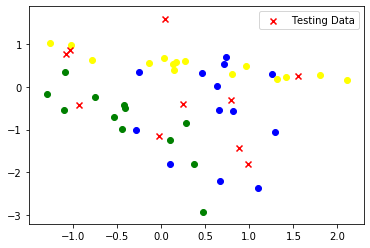

In [126]:
# Generate a synthetica 2D dataset
X, y = make_classification(n_samples=50, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=3, n_clusters_per_class=1, 
                           weights=None, flip_y=0.01, class_sep=0.5, hypercube=True,
                           shift=0.0, scale=1.0, shuffle=True, random_state=42)

# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Visualize the generated data
colors = ['blue', 'yellow', 'green']
for i, color in enumerate(colors):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], c=color)
plt.scatter(X_test[:, 0], X_test[:,1], c='red', marker='x', label='Testing Data')
plt.legend(loc='best')
plt.show()

In [127]:
# Create and training a Gaussian Naive Bayes classifier model
clf = GaussianNB()
clf.fit(X_train, y_train)

# Use the model to predict testing data
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print('Testing accuracy is: %.4f\n' % accuracy)

Testing accuracy is: 0.8000



In [128]:
# Explore the learned probability (model parameters)
print('Estimated probability of classess: \n', clf.class_prior_)
print('Estimated mean for each Gaussian distribution: \n', clf.theta_)
print('Estimated variance for each Gaussian distribution: \n', clf.sigma_)

Estimated probability of classess: 
 [0.325 0.375 0.3  ]
Estimated mean for each Gaussian distribution: 
 [[ 0.609  -0.5612]
 [ 0.3967  0.513 ]
 [-0.4016 -0.8369]]
Estimated variance for each Gaussian distribution: 
 [[0.2323 1.0484]
 [0.9352 0.0663]
 [0.331  0.6756]]


For example, for Class 0 and the first feature, we can have the following Gaussian disribution

$$P(x_0 \mid Class=0) = \frac{1}{\sqrt{2\pi\cdot0.2323}} \exp\left(-\frac{(x_0 - 0.6090)^2}{2\cdot0.2323}\right)$$

In [129]:
# Use 10-fold cross validation to show a more robust prediction accuracy
clf = GaussianNB()
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=10)
print('Gaussian Naive Bayes accuracy range: [%.4f, %.4f]; mean: %.4f; std: %.4f\n' % (scores.min(), scores.max(), scores.mean(), scores.std()))

Gaussian Naive Bayes accuracy range: [0.3333, 1.0000]; mean: 0.6967; std: 0.1773



**Tasks** - The training data is generated as follows:

In [130]:
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])

# Firstly, let's do the parameter estimation manually without using the model
X_0_C_1=X[y==1][:,0]
X_1_C_1=X[y==1][:,1]
X_0_C_2=X[y==2][:,0]
X_1_C_2=X[y==2][:,1]

manual_means = np.array([[X_0_C_1.mean(), X_1_C_1.mean()], [X_0_C_2.mean(), X_1_C_2.mean()]])
np.set_printoptions(precision=4)
print('Means estaimated manually: \n', manual_means)
manual_vars = np.array([[X_0_C_1.var(), X_1_C_1.var()], [X_0_C_2.var(), X_1_C_2.var()]])
print('Variances estaimated manually: \n', manual_vars)

Means estaimated manually: 
 [[-2.     -1.3333]
 [ 2.      1.3333]]
Variances estaimated manually: 
 [[0.6667 0.2222]
 [0.6667 0.2222]]


**Q1**: Training a GaussianNB model and print out the learned model parameters (parameters of probability distributions). And check if the learned parameters comply with the manually estimated ones as shown above.

In [131]:
# Create and training a Gaussian Naive Bayes classifier model
clf = GaussianNB()
clf.fit(X, y)

print('Estimated means: \n', clf.theta_)
print('Estimated variance: \n', clf.sigma_)

Estimated means: 
 [[-2.     -1.3333]
 [ 2.      1.3333]]
Estimated variance: 
 [[0.6667 0.2222]
 [0.6667 0.2222]]


**Answer to Q1**: 

Estimated means: 
 [[-2.     -1.3333]
 [ 2.      1.3333]]
Estimated variance: 
 [[0.6667 0.2222]
 [0.6667 0.2222]]
 
 Yes. It complies with the ones estimated by hand

**Q2**: Predict the label of a data [-0.8,-1]:

In [132]:
X_new = [[-0.8,-1]]
y_pred = clf.predict(X_new)
print('Class label is: %.f\n' % y_pred[0])

Class label is: 1



**Answer to Q2**: 1

# 2 MultinomialNB

The [MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB) classification model is suitable for classification with discrete features. To let the model handle to categorical data, we often need to transform the categorical values to numberic ones, through [encoding](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) methods.

In [133]:
# Load the weather data
weather_data = pd.read_csv('weather.csv')
print(weather_data.head())
print('\nData shape: ', weather_data.shape)

    Outlook Humidity    Wind Play
0     Sunny     High    Weak   No
1     Sunny     High  Strong   No
2  Overcast     High    Weak  Yes
3      Rain     High    Weak  Yes
4      Rain   Normal    Weak  Yes

Data shape:  (14, 4)


In [134]:
# Data pre-processing and preparation
# Firstly, we need to convert the date from being categorical to being numerical
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
coded_data = enc.fit_transform(weather_data)

X = coded_data[:, 0:-1]
y = coded_data[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [135]:
# Creat and train a model
clf_mnb = MultinomialNB()
clf_mnb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [136]:
# Evaluate the model
y_pred = clf_mnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy is: %.4f\n' % accuracy)

Accuracy is: 0.7500



In [137]:
# Explore the learned model parameters (probabilities)
# Note that the probabilities are in the logorithmic form. Why? The log-sum-exp trick for underflow of probability products
print('Estimated probability of classess: \n', np.e**clf_mnb.class_log_prior_)
print('Estimated class-conditional probabilities for each feature: \n', np.e**clf_mnb.feature_log_prob_)

Estimated probability of classess: 
 [0.4 0.6]
Estimated class-conditional probabilities for each feature: 
 [[0.6364 0.1818 0.1818]
 [0.4118 0.2941 0.2941]]


**Tasks** - The training data is generated as follows. The number of data instances (6) is small while the demensionality of the data is relatively highly (100).

In [138]:
import numpy as np
X = np.random.randint(5, size=(6, 100))
y = np.array([1, 2, 3, 4, 5, 6])

**Q3**: Training a MultinomialNB model, and predict the label of a data X_new = [[1,2,1,0,2,3,0,3,2,1,1,3,3,0,4,2,2,0,0,2,2,3,4,4,4,4,0,3,3,
          1,1,1,2,3,1,3,0,2,2,0,4,2,4,3,2,0,1,1,1,2,3,0,0,3,4,3,3,4,
          2,1,0,0,0,0,4,1,2,0,0,4,4,0,4,1,3,1,1,1,3,1,1,1,4,3,1,1,3,
          2,0,0,0,3,4,1,1,4,3,2,3,4]]:

In [139]:
# Training a MultinomialNB model
clf_mnb = MultinomialNB()
clf_mnb.fit(X, y)

#print('Estimated probability of classess: \n', np.e**clf_mnb.class_log_prior_)
#print('Estimated class-conditional probabilities for each feature: \n', np.e**clf_mnb.feature_log_prob_)

# Predict the class of the new data instance
#X_new = np.random.randint(5, size=(1, 100))
X_new = [[1,2,1,0,2,3,0,3,2,1,1,3,3,0,4,2,2,0,0,2,2,3,4,4,4,4,0,3,3,
          1,1,1,2,3,1,3,0,2,2,0,4,2,4,3,2,0,1,1,1,2,3,0,0,3,4,3,3,4,
          2,1,0,0,0,0,4,1,2,0,0,4,4,0,4,1,3,1,1,1,3,1,1,1,4,3,1,1,3,
          2,0,0,0,3,4,1,1,4,3,2,3,4]]
clf_mnb.predict(X_new)

array([6])

**Answer to Q3**: Can be any number in {1, 2, 3, 4, 5, 6}

**Q4**: In our lecture, we discussed that if there is no occurence of some feature values, zero probabilities will appear. To overcome this issue, Laplace correction (smoothing) is proposed, as shown in the follow formula. In the [MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB) implementation, the parameter 'alpha' controls the way we apply Laplace smoothing. The default value is 'alpha=1.0'. Please create and train a model with no Laplace smoothing for the above data set. Compare the leaned model parameters (probabilities) with the case 'alpha=1', by checking if there are zero probabilities (note that due to the accuracy issue, zero might be represented as a signficantly small number by the computer)
$$p(x_{yi}|y)=\frac{N_{yi}+\alpha}{N_y+{\alpha}n}$$

In [140]:
# Create and train a MultinomialNB model with no Laplace smoothing
clf_mnb = MultinomialNB(alpha=0)
clf_mnb.fit(X, y)

print('Estimated probability of classess: \n', np.e**clf_mnb.class_log_prior_)
print('Estimated class-conditional probabilities for each feature: \n', np.e**clf_mnb.feature_log_prob_)

Estimated probability of classess: 
 [0.1667 0.1667 0.1667 0.1667 0.1667 0.1667]
Estimated class-conditional probabilities for each feature: 
 [[1.5464e-02 1.5464e-02 5.1546e-03 1.5464e-02 1.5464e-02 2.0619e-02
  1.0309e-02 2.0619e-02 5.1546e-13 1.5464e-02 1.5464e-02 1.0309e-02
  2.0619e-02 1.5464e-02 2.0619e-02 1.5464e-02 1.5464e-02 1.0309e-02
  1.5464e-02 1.0309e-02 5.1546e-13 5.1546e-13 1.5464e-02 2.0619e-02
  2.0619e-02 5.1546e-13 1.5464e-02 5.1546e-13 5.1546e-13 5.1546e-13
  5.1546e-03 1.0309e-02 5.1546e-03 1.5464e-02 1.0309e-02 2.0619e-02
  2.0619e-02 5.1546e-13 1.0309e-02 5.1546e-13 5.1546e-13 5.1546e-03
  5.1546e-03 2.0619e-02 1.5464e-02 5.1546e-13 1.0309e-02 2.0619e-02
  2.0619e-02 5.1546e-03 5.1546e-13 1.0309e-02 1.5464e-02 2.0619e-02
  1.5464e-02 5.1546e-03 1.0309e-02 1.5464e-02 5.1546e-13 5.1546e-03
  1.5464e-02 2.0619e-02 1.5464e-02 5.1546e-03 1.0309e-02 5.1546e-03
  5.1546e-03 5.1546e-13 5.1546e-13 5.1546e-13 1.5464e-02 5.1546e-13
  2.0619e-02 1.5464e-02 2.0619e-02 5.1546

**Answer to Q4**: Yes, there are many zeros (x.xxx e-13). Zero probabilities occur due to the lack of attribute values, given that we only have 6 data instances, while we have 100 features and each has 5 possible values.

# 3 Process on 'Iris' Data

In Week 9, we have studied how to use KNN algorithm to do classification task on 'iris' data. Here,we are going to employ the GaussianNB to conduct the same task. 

In [173]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data['data'], iris_data['target'], random_state=42)

**Q4**：Report the prediction result on test data.

In [174]:
clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('Accuracy is: %.4f\n' % accuracy_score(y_test, y_pred))

Accuracy is: 1.0000



**Answer to Q4**: Accuracy is 1.0

**Q5**: Compare the prediction accuaracy between KNN clasifier (use the optimal K you've identied) and Gaussian Naive Bayes. Use 10-cross validation to report the accuracy mean and standard deviation (Note this is to ensure the comparison is based on robust performace). Which classifidation mdoel is more accurate on Iris data set?

In [181]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

clf_gnb = GaussianNB()
clf_knn = KNeighborsClassifier(n_neighbors=13)

scores = cross_val_score(clf_gnb, iris_data['data'], iris_data['target'], scoring='accuracy', cv=10)
print('Gaussian Naive Bayes accuracy range: [%.4f, %.4f]; mean: %.4f; std: %.4f\n'
      % (scores.min(), scores.max(), scores.mean(), scores.std()))
scores_gnb = scores

scores = cross_val_score(clf_knn, iris_data['data'], iris_data['target'], scoring='accuracy', cv=10)
print('KNN Classifier accuracy range: [%.4f, %.4f]; mean: %.4f; std: %.4f\n'
      % (scores.min(), scores.max(), scores.mean(), scores.std()))
scores_knn = scores

# This is to show t-test on their performances.
from scipy.stats import ttest_ind
t, p = ttest_ind(scores_gnb, scores_knn)
print ('t, p: %.4f, %.4f\n' % (t, p))

Gaussian Naive Bayes accuracy range: [0.8667, 1.0000]; mean: 0.9533; std: 0.0427

KNN Classifier accuracy range: [0.9333, 1.0000]; mean: 0.9800; std: 0.0306

t, p: -1.5240, 0.1449



**Answer to Q5**: 
    
Gaussian Naive Bayes accuracy range: [0.8667, 1.0000]; mean: 0.9533; std: 0.0427

KNN Classifier accuracy range: [0.9333, 1.0000]; mean: 0.9800; std: 0.0306
    
The averaged accuracy of the K nearest neigthbors classifier is higher than that of the Naive Bayes classifier. But in terms of t-test, the two performances of the two classifiers are not statistically significantly different if we use the significance level 0.05, as the p value 0.1449 > 0.05.

**Q6**: Can we use Multinomial Naive Bayes classifiation model for Iris data? Yes! We can discretize continuous features by use the [KBinsDiscretizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html#sklearn.preprocessing.KBinsDiscretizer) method. Note that you can different ways of discrization. Please report the prediction result with the following discritization method. Also, try another discritization method with parameter 'encode=onehot', and report the prediction result. Use 10-cross validation to report the accuracy mean and standard deviation as we did above. 

In [179]:
from sklearn.preprocessing import KBinsDiscretizer
encoder = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X = encoder.fit_transform(iris_data['data'])
y = iris_data['target']

clf_mnb = MultinomialNB()
scores = cross_val_score(clf_mnb, X, y, scoring='accuracy', cv=10)
print('Accuracy range with ordinal discretization: [%.4f, %.4f]; mean: %.4f; std: %.4f\n'
      % (scores.min(), scores.max(), scores.mean(), scores.std()))
scores_ordinal = scores

encoder = KBinsDiscretizer(n_bins=5, encode='onehot', strategy='uniform')
X = encoder.fit_transform(iris_data['data'])
y = iris_data['target']
clf_mnb = MultinomialNB()
scores = cross_val_score(clf_mnb, X, y, scoring='accuracy', cv=10)
print('Accuracy range with onehot discretization: [%.4f, %.4f]; mean: %.4f; std: %.4f\n'
      % (scores.min(), scores.max(), scores.mean(), scores.std()))
scores_onehot = scores

# This is to show t-test on their performances.
from scipy.stats import ttest_ind
t, p = ttest_ind(scores_ordinal, scores_onehot)
print ('t, p: %.4f, %.8f\n' % (t, p))

Accuracy range with ordinal discretization: [0.4667, 0.8667]; mean: 0.7000; std: 0.1043

Accuracy range with onehot discretization: [0.8000, 1.0000]; mean: 0.9200; std: 0.0653

t, p: -5.3612, 0.00004278



**Answer to Q6**:

Accuracy range with ordinal discretization: [0.4667, 0.8667]; mean: 0.7000; std: 0.1043

Accuracy range with onehot discretization: [0.8000, 1.0000]; mean: 0.9200; std: 0.0653

The discretization with onehot encoding can be regarded much better than that with ordinal encoding. The p value 0.00004278 is much smaller than the commonly-used significance level 0.05.

# 4 Predict Human Activity Recognition (HAR)

The objective of this practice exercise is to predict current human activity based on phisiological activity measurements from 53 different features based in the [HAR dataset](http://groupware.les.inf.puc-rio.br/har#sbia_paper_section). The training (`har_train.csv`) and test (`har_validate.csv`) datasets are provided.

**Q7**: Build a Naive Bayes model, predict on the test dataset and compute the [confusion matrix](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62). Note: Please refer to the [`sklearn.metrics.confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html). This is a check point question for this week's workshop. You need to report accuracy_scores on train and test set of Human Activity Recognition dataset. Also provide confusion matrix on test set and provide a brief interpretation of your results based on accuracy scores and confusion matrix (which class is misclassified into what). Your description should not be more than a paragraph.

In [40]:
import pandas as pd
%matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
har_train = pd.read_csv("har_train.csv")
har_test = pd.read_csv("har_test.csv")

In [41]:
print("train shape: ", har_train.shape)
print("test shape: ", har_test.shape)
print(har_train.head())

train shape:  (13737, 53)
test shape:  (5885, 53)
  classe  roll_belt  pitch_belt  yaw_belt  total_accel_belt  gyros_belt_x  \
0      A       1.41        8.07     -94.4                 3          0.00   
1      A       1.41        8.07     -94.4                 3          0.02   
2      A       1.42        8.07     -94.4                 3          0.00   
3      A       1.48        8.05     -94.4                 3          0.02   
4      A       1.45        8.06     -94.4                 3          0.02   

   gyros_belt_y  gyros_belt_z  accel_belt_x  accel_belt_y  ...  \
0           0.0         -0.02           -21             4  ...   
1           0.0         -0.02           -22             4  ...   
2           0.0         -0.02           -20             5  ...   
3           0.0         -0.03           -22             3  ...   
4           0.0         -0.02           -21             4  ...   

   total_accel_forearm  gyros_forearm_x  gyros_forearm_y  gyros_forearm_z  \
0            

In [42]:
# checking all 53 column names in the dataset
print(har_train.columns)

# The variable to predict (or label) is "classe" column. 
# checking number of classes in classe column
print("\n",set(har_train['classe']))

Index(['classe', 'roll_belt', 'pitch_belt', 'yaw_belt', 'total_accel_belt',
       'gyros_belt_x', 'gyros_belt_y', 'gyros_belt_z', 'accel_belt_x',
       'accel_belt_y', 'accel_belt_z', 'magnet_belt_x', 'magnet_belt_y',
       'magnet_belt_z', 'roll_arm', 'pitch_arm', 'yaw_arm', 'total_accel_arm',
       'gyros_arm_x', 'gyros_arm_y', 'gyros_arm_z', 'accel_arm_x',
       'accel_arm_y', 'accel_arm_z', 'magnet_arm_x', 'magnet_arm_y',
       'magnet_arm_z', 'roll_dumbbell', 'pitch_dumbbell', 'yaw_dumbbell',
       'total_accel_dumbbell', 'gyros_dumbbell_x', 'gyros_dumbbell_y',
       'gyros_dumbbell_z', 'accel_dumbbell_x', 'accel_dumbbell_y',
       'accel_dumbbell_z', 'magnet_dumbbell_x', 'magnet_dumbbell_y',
       'magnet_dumbbell_z', 'roll_forearm', 'pitch_forearm', 'yaw_forearm',
       'total_accel_forearm', 'gyros_forearm_x', 'gyros_forearm_y',
       'gyros_forearm_z', 'accel_forearm_x', 'accel_forearm_y',
       'accel_forearm_z', 'magnet_forearm_x', 'magnet_forearm_y',
       'ma

In [43]:
# Separate features and class labels
X_train = har_train.drop(['classe'], axis=1)
y_train = har_train['classe']
X_test = har_test.drop(['classe'], axis=1)
y_test = har_test['classe']
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (13737, 52)
y_train shape:  (13737,)
X_test shape:  (5885, 52)
y_test shape:  (5885,)


In [44]:
# Create and train the model
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Accuracy on train set: 0.5581
Accuracy on test set: 0.5543
[[1070   95  262  212   35]
 [ 127  685  145   76  106]
 [ 223  106  512  136   49]
 [ 102   35  271  441  115]
 [  51  239   95  143  554]]


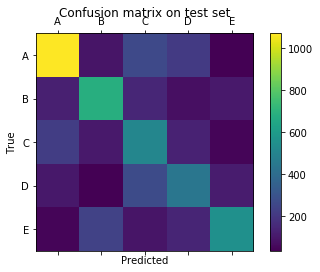

In [45]:
# Reporting accuracy score and confusion matrix on test set
y_pred_train = gnb_clf.predict(X_train)
y_pred_test = gnb_clf.predict(X_test)
print("Accuracy on train set: %.4f" % accuracy_score(y_train, y_pred_train))
print("Accuracy on test set: %.4f" % accuracy_score(y_test, y_pred_test))
labels = ['A', 'B', 'C', 'D', 'E']
cm = confusion_matrix(y_test, y_pred_test, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix on test set')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()